In [1]:
# Here I will be looking at the Recruit Restaurant Visitor Forecasting dataset from Kaggle

In [2]:
# From data source:

# -Hot Pepper Gourmet (hpg): similar to Yelp, here users can search restaurants and also make a reservation online

# -AirREGI / Restaurant Board (air): similar to Square, a reservation control and cash register system

# Files:
    
# air_reserve.csv - This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

# hpg_reserve.csv - This file contains reservations made in the hpg system.

# air_store_info.csv - This file contains information about select air restaurants. Column names and contents are self-explanatory.

# hpg_store_info.csv - This file contains information about select hpg restaurants. Column names and contents are self-explanatory.

# store_id_relation.csv - This file allows you to join select restaurants that have both the air and hpg system.

# air_visit_data.csv - This file contains historical visit data for the air restaurants.

# date_info.csv - This file gives basic information about the calendar dates in the dataset.


In [3]:
import os,sys
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import descartes
import geopandas as gpd

In [4]:
air_reserve = pd.read_csv('../Datasets/restaurants_japan/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
air_store = pd.read_csv('../Datasets/restaurants_japan/air_store_info.csv')
hpg_reserve = pd.read_csv('../Datasets/restaurants_japan/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
hpg_store = pd.read_csv('../Datasets/restaurants_japan/hpg_store_info.csv')
air_visit = pd.read_csv('../Datasets/restaurants_japan/air_visit_data.csv')
store_id_relation = pd.read_csv('../Datasets/restaurants_japan/store_id_relation.csv')
date_info = pd.read_csv('../Datasets/restaurants_japan/date_info.csv')

In [5]:
# We can combine the air and hpg csvs into singular dataframes

In [6]:
df_hpg = pd.merge(hpg_reserve, hpg_store, on='hpg_store_id')
df_air = pd.merge(air_reserve, air_store, on='air_store_id')

In [7]:
df_hpg_relation = pd.merge(df_hpg,store_id_relation, how='left', on = 'hpg_store_id')
df_air_relation = pd.merge(df_air,store_id_relation, how='left', on = 'air_store_id')

In [8]:
# Merge all

df_full = pd.merge(df_hpg_relation,df_air_relation, how='outer')

In [9]:
df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi


In [10]:
# Change dates to ensure datetime objects
df_air['visit_datetime'] = pd.to_datetime(df_air['visit_datetime'])
df_air['reserve_datetime'] = pd.to_datetime(df_air['reserve_datetime'])
df_hpg['visit_datetime'] = pd.to_datetime(df_hpg['visit_datetime'])
df_hpg['reserve_datetime'] = pd.to_datetime(df_hpg['reserve_datetime'])
df_full['visit_datetime'] = pd.to_datetime(df_full['visit_datetime'])
df_full['reserve_datetime'] = pd.to_datetime(df_full['reserve_datetime'])

In [11]:
# Cumulating the reserve times and visit, adding up all the visitors
cum_df_reserve = df_full.groupby(['reserve_datetime']).sum().sort_values(by=['reserve_datetime'],ascending=True)
cum_df_visit = df_full.groupby(['visit_datetime']).sum().sort_values(by=['visit_datetime'],ascending=True)


In [12]:
cum_df_reserve.head()

,reserve_visitors,latitude,longitude
reserve_datetime,,,
2016-01-01 00:00:00,90,704.917747,2642.569365
2016-01-01 01:00:00,57,415.084550,1509.784428
2016-01-01 02:00:00,15,195.043211,701.673945
2016-01-01 03:00:00,27,174.709774,686.295219
2016-01-01 04:00:00,40,211.888717,818.645405


In [13]:
cum_df_visit.head()

,reserve_visitors,latitude,longitude
visit_datetime,,,
2016-01-01 13:00:00,3,34.692109,135.191698
2016-01-01 17:00:00,35,471.788971,1790.502448
2016-01-01 18:00:00,84,876.081696,3401.770555
2016-01-01 19:00:00,106,1239.450177,4759.756826
2016-01-01 20:00:00,26,321.175790,1224.093007


In [14]:
# Doing some clustering


# There are 8 regions in Japan -> 8 clusters: https://en.wikipedia.org/wiki/List_of_regions_of_Japan

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12).fit(df_full[['longitude','latitude']])
df_full['cluster'] = kmeans.predict(df_full[['longitude','latitude']])
cluster_centers = kmeans.cluster_centers_

In [15]:
# This is the location of the centers of clusters
cluster_centers

array([[135.02610952,  34.72692971],
       [139.67880953,  35.67611687],
       [141.32933868,  43.00328219],
       [130.5142751 ,  33.6349562 ],
       [139.00348924,  37.81631394],
       [137.73607962,  34.71927621],
       [132.4666604 ,  34.3944754 ],
       [140.87764688,  38.27511918],
       [138.45335351,  34.99171211],
       [142.55745313,  43.69576837],
       [135.50748105,  34.68721609],
       [133.36215122,  34.48923642]])

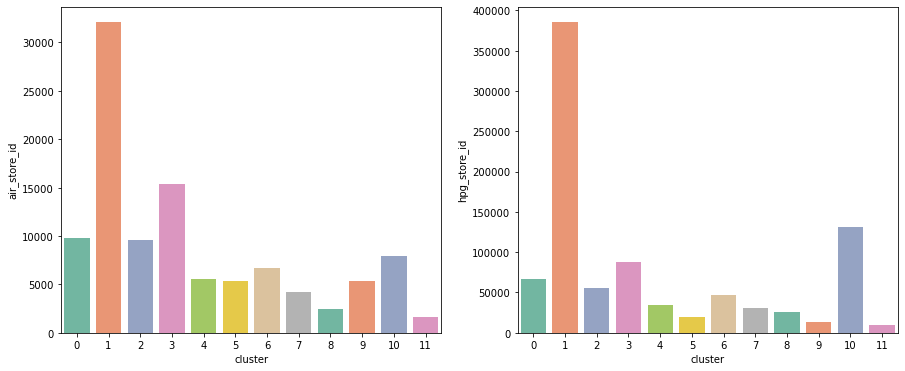

In [16]:
# Looking at cluster histograms
fig,ax = plt.subplots(1,2,figsize=(15,6))
cluster_histogram = df_full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=cluster_histogram['cluster'],y=cluster_histogram['air_store_id'],ax=ax[0], palette= "Set2")
sns.barplot(x=cluster_histogram['cluster'],y=cluster_histogram['hpg_store_id'],ax=ax[1], palette= "Set2")
plt.show()

In [17]:
cluster_histogram

,cluster,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name
0,0,66771,71610,71610,71610,63317,63317,71610,71610,9771,8293,8293
1,1,385196,401934,401934,401934,372936,372936,401934,401934,32094,28998,28998
2,2,55174,59459,59459,59459,51135,51135,59459,59459,9588,8324,8324
3,3,87283,96026,96026,96026,82756,82756,96026,96026,15362,13270,13270
4,4,34637,36354,36354,36354,32368,32368,36354,36354,5537,3986,3986
5,5,19405,22417,22417,22417,17479,17479,22417,22417,5306,4938,4938
6,6,47429,50225,50225,50225,44175,44175,50225,50225,6649,6050,6050
7,7,30954,34913,34913,34913,30711,30711,34913,34913,4202,4202,4202
8,8,26115,27398,27398,27398,24981,24981,27398,27398,2417,2417,2417
9,9,13542,16092,16092,16092,11910,11910,16092,16092,5364,4182,4182


In [18]:
# Defining cluster count
cluster_count = cluster_histogram['cluster'].count()

In [19]:
# Define a base map
japan_map = gpd.read_file("../Datasets/restaurants_japan/Igismap/Japan_Boundary.shp")

In [20]:
# Defining colormaps for clusters
cm = plt.get_cmap('Set2')
colors = [cm(2.*i/cluster_count) for i in range(cluster_count)]
colored = [colors[i] for i in df_full['cluster']]

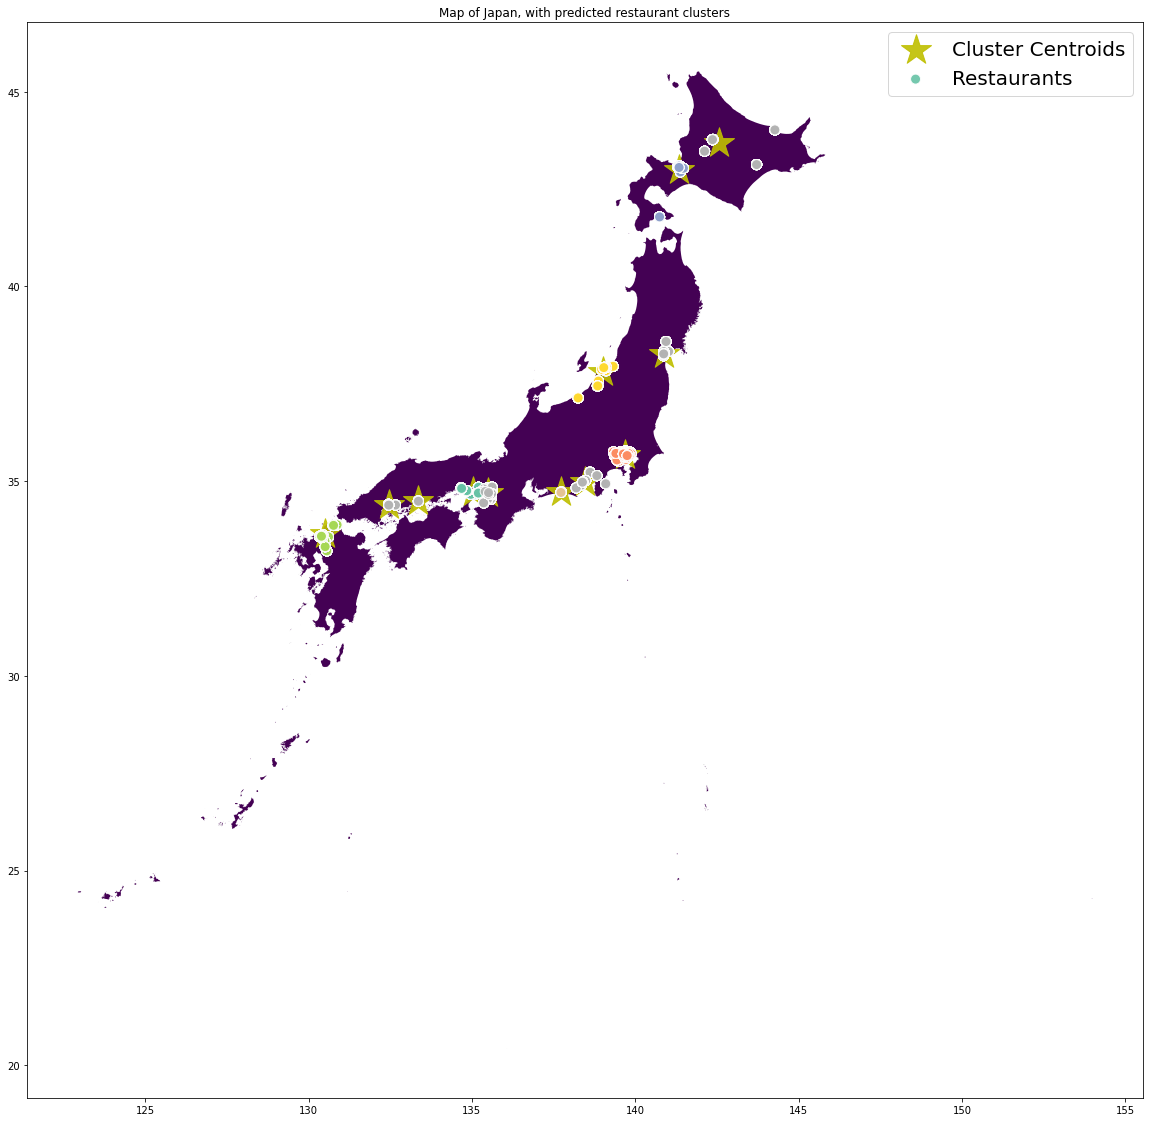

In [21]:

fig,ax = plt.subplots(figsize = (20,20))
# Base map
ax1 = japan_map.plot(ax = ax,cmap = 'viridis')
# Plotting cluster centroids 
x = cluster_centers[:,0]
y = cluster_centers[:,1]
ax2 = ax.scatter(x,y ,c= 'y', s = 1000,alpha = 0.9, edgecolors='y', label = 'Cluster Centroids', marker='*')
# Plotting restaurants 
x2 = df_full['longitude']
y2 = df_full['latitude']
ax3 = ax.scatter(x2,y2 ,c= colored, s = 100 , alpha = 0.9,edgecolors='w',label = 'Restaurants')

plt.legend(prop={'size': 20})
plt.title('Map of Japan, with predicted restaurant clusters')


plt.show()

In [22]:
# Looking at aggregations for day of the week, hours of the day

#Group by days
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
week_df_visit = df_full.groupby(df_full['visit_datetime'].dt.day_name()).count().reindex(days)

In [23]:
df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,10


In [24]:
# Looking at times
time_df_visit = df_full
time_df_visit.index = time_df_visit['visit_datetime']

time_df_visit = time_df_visit.drop(['latitude','longitude'], axis = 1)

In [25]:
time_df_visit = time_df_visit.groupby(time_df_visit.index.hour).count()

In [26]:
time_df_visit.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,air_store_id,air_genre_name,air_area_name,cluster
visit_datetime,,,,,,,,,,
0,1082,1308,1308,1308,878,878,450,430,430,1308
1,726,923,923,923,593,593,338,330,330,923
2,278,379,379,379,190,190,191,189,189,379
3,151,198,198,198,80,80,119,118,118,198
4,95,110,110,110,55,55,56,55,55,110


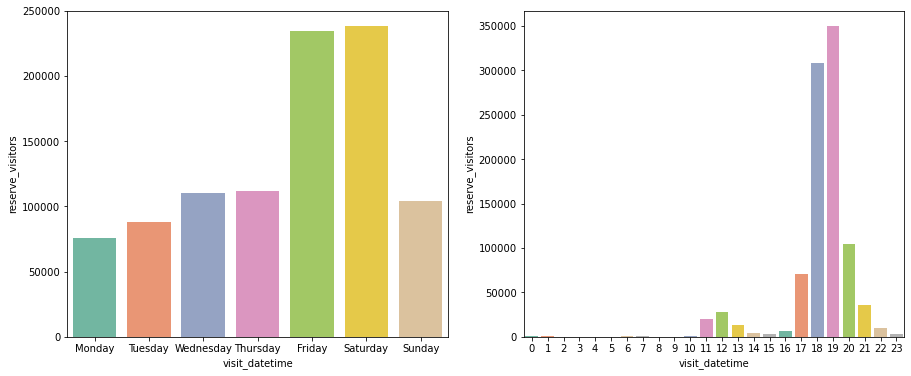

In [27]:
# Looking at time of day and day of week hisograms for actual visitors
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x=week_df_visit.index,y=week_df_visit['reserve_visitors'],ax=ax[0], palette= "Set2")
sns.barplot(x=time_df_visit.index,y=time_df_visit['reserve_visitors'],ax=ax[1], palette= "Set2")
plt.show()

In [28]:
# As expected, Friday and Sturday dinner times are massively more statistically relevant than other times and days

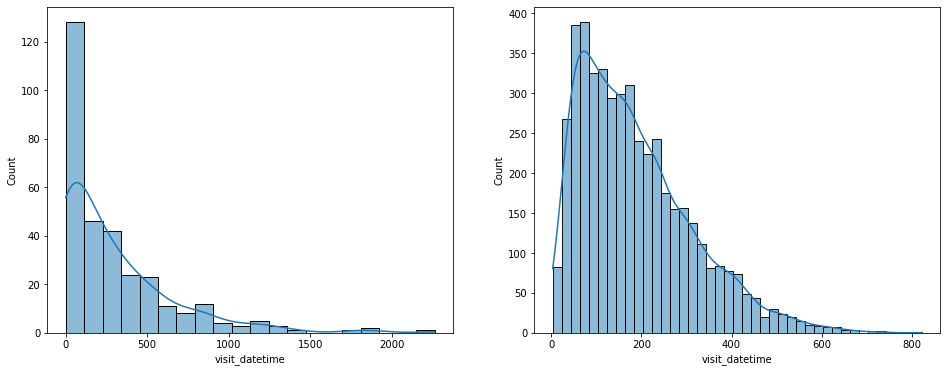

In [29]:
# Distribution of
fig,ax = plt.subplots(1,2,figsize=(16,6))
air_histogram = df_air.groupby(['air_store_id']).count()
sns.histplot(air_histogram['visit_datetime'], kde = True, ax=ax[0])
hpg_histogram = df_hpg.groupby(['hpg_store_id']).count()
sns.histplot(hpg_histogram['visit_datetime'], kde = True, ax=ax[1])
plt.show()

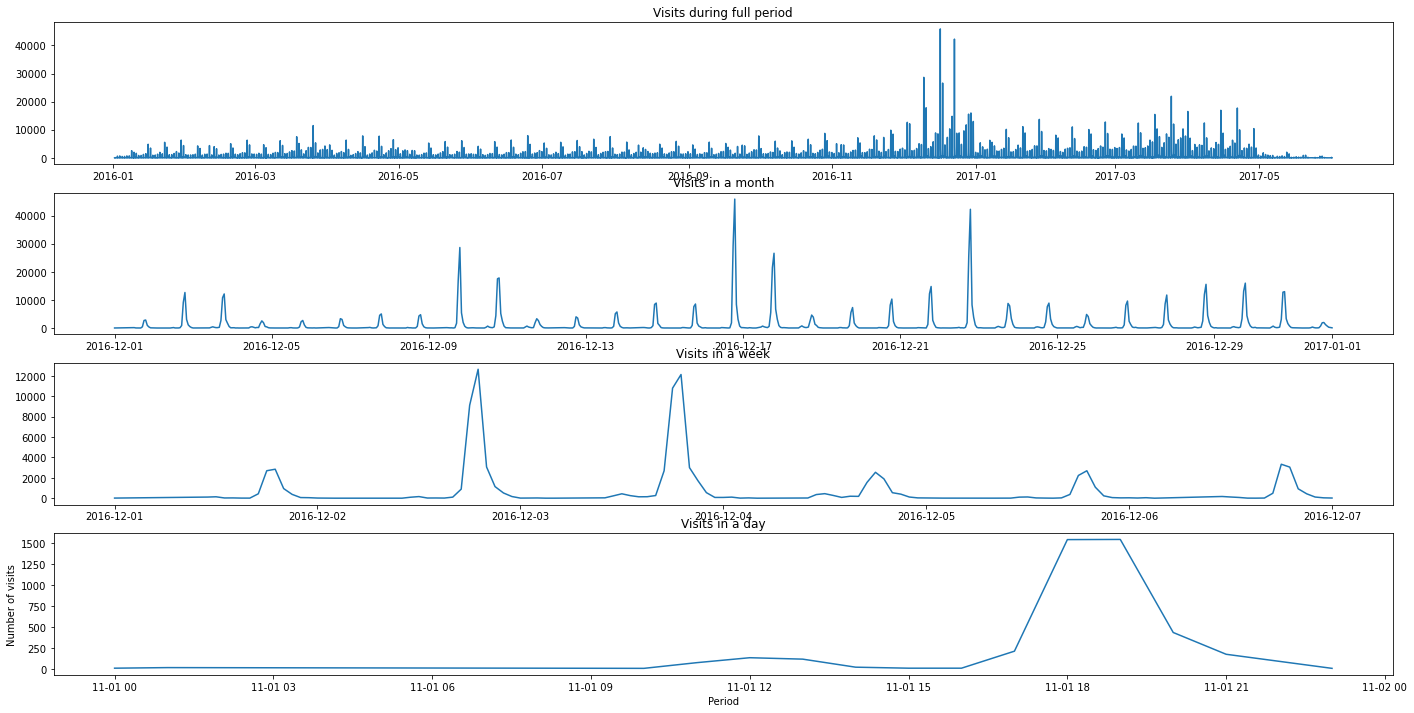

In [30]:
# Number of visits in any given day, month and week

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (24,12))
ax1.plot(cum_df_visit['reserve_visitors'])
ax1.set_title("Visits during full period")
plt.ylabel("Number of visit")
ax2.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'])
ax2.set_title("Visits in a month")
plt.ylabel("Number of visits")
ax3.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'])
ax3.set_title("Visits in a week")
plt.ylabel("Number of visits")
ax4.plot(cum_df_visit['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'])
ax4.set_title("Visits in a day")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.show()

In [31]:
# Looking at discrepancy between number of reservations and actual visits for same time ranges

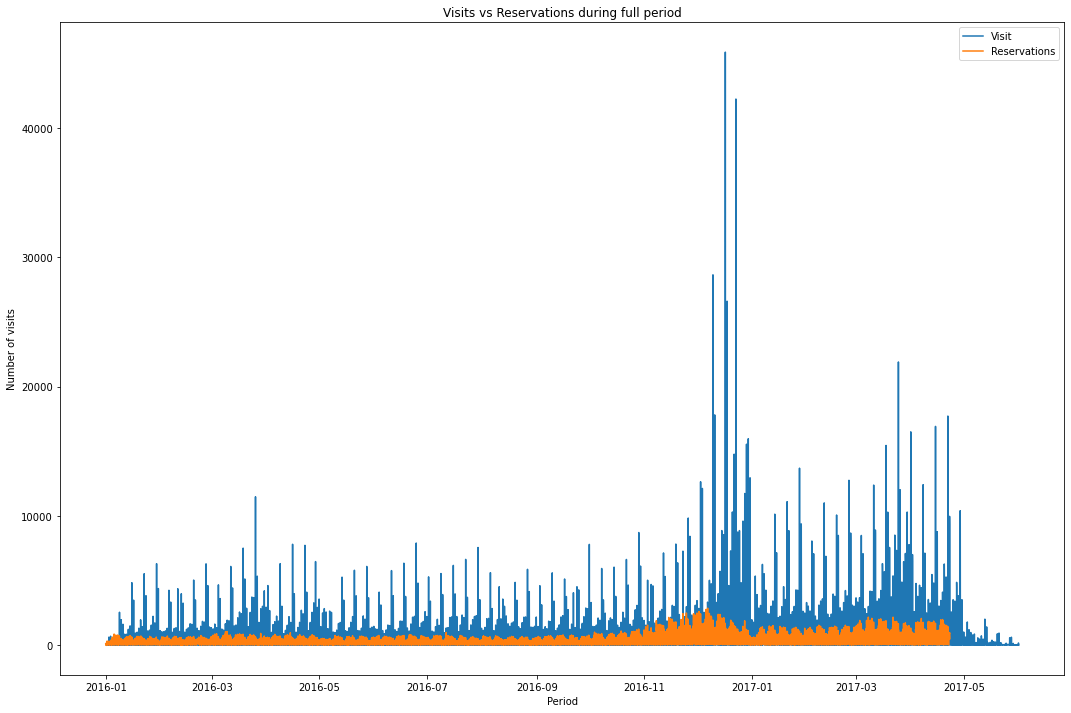

In [32]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during full period")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

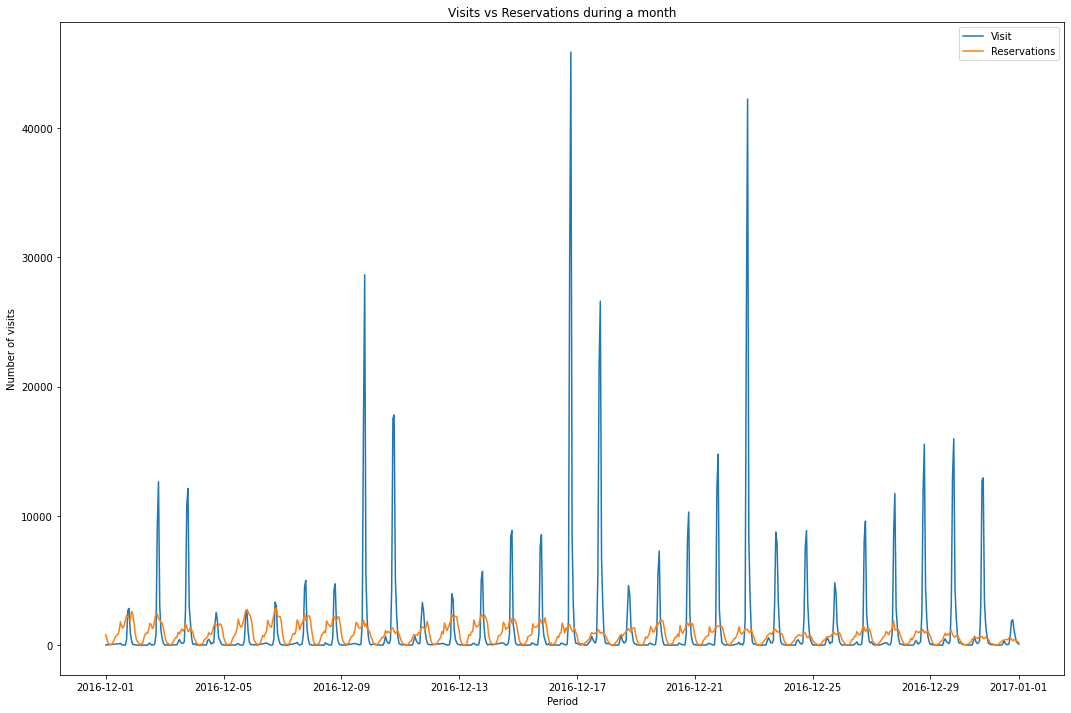

In [33]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

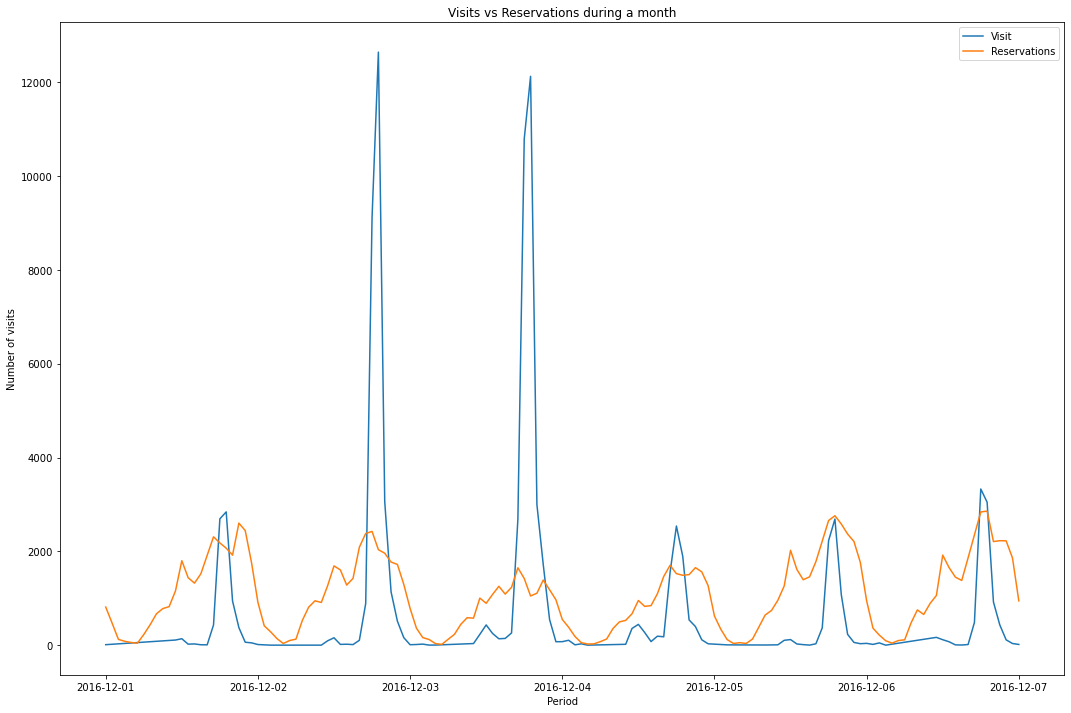

In [34]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

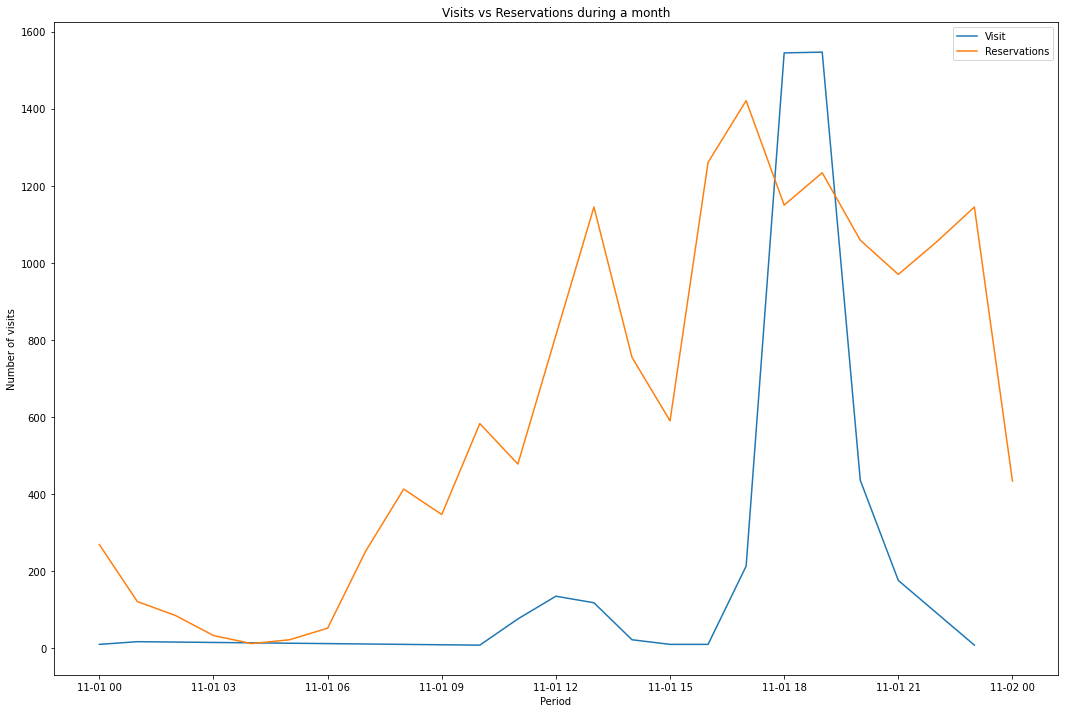

In [35]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [36]:
# Can see that in any given time window, many more people visit instead of reserve.

In [37]:
# Looking at aggregated windows

m1 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.month]).sum()
m1_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.month]).sum()
m2 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.weekday]).sum()
m2_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.weekday]).sum()
m3 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.hour]).sum()
m3_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.hour]).sum()

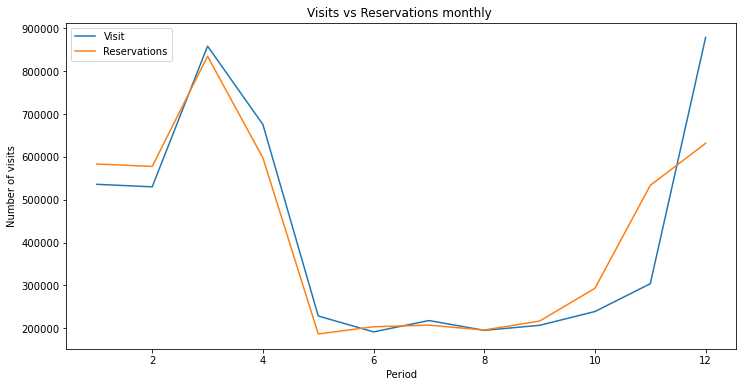

In [38]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m1, label = 'Visit')
ax1.plot(m1_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations monthly ")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [39]:
# Can be seen that this ties in well with the combination of cherry blossom period (march/april) and Christams (dec)

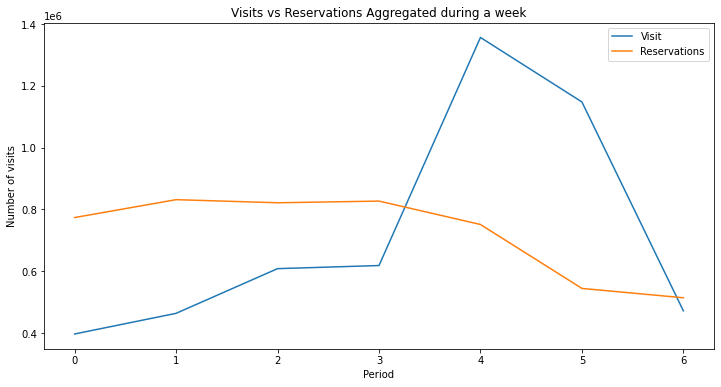

In [40]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m2, label = 'Visit')
ax1.plot(m2_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a week")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

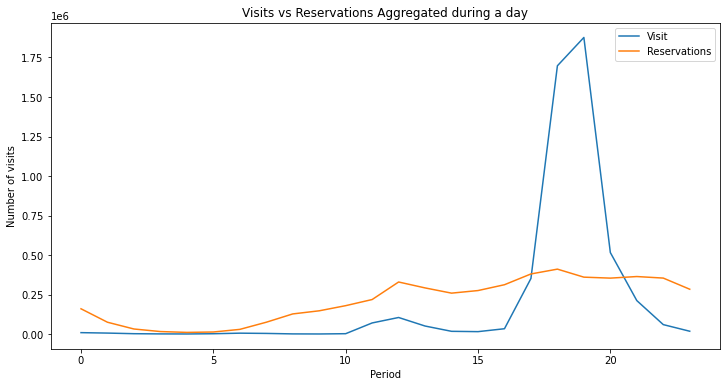

In [41]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m3, label = 'Visit')
ax1.plot(m3_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a day")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [42]:
# Now I'll explore how many visitors per genre

In [43]:
# First with air_genre
air_genre = df_air.groupby(by='air_genre_name').sum().drop(['latitude', 'longitude'],axis = 1).sort_values(by=['reserve_visitors'],ascending=True)

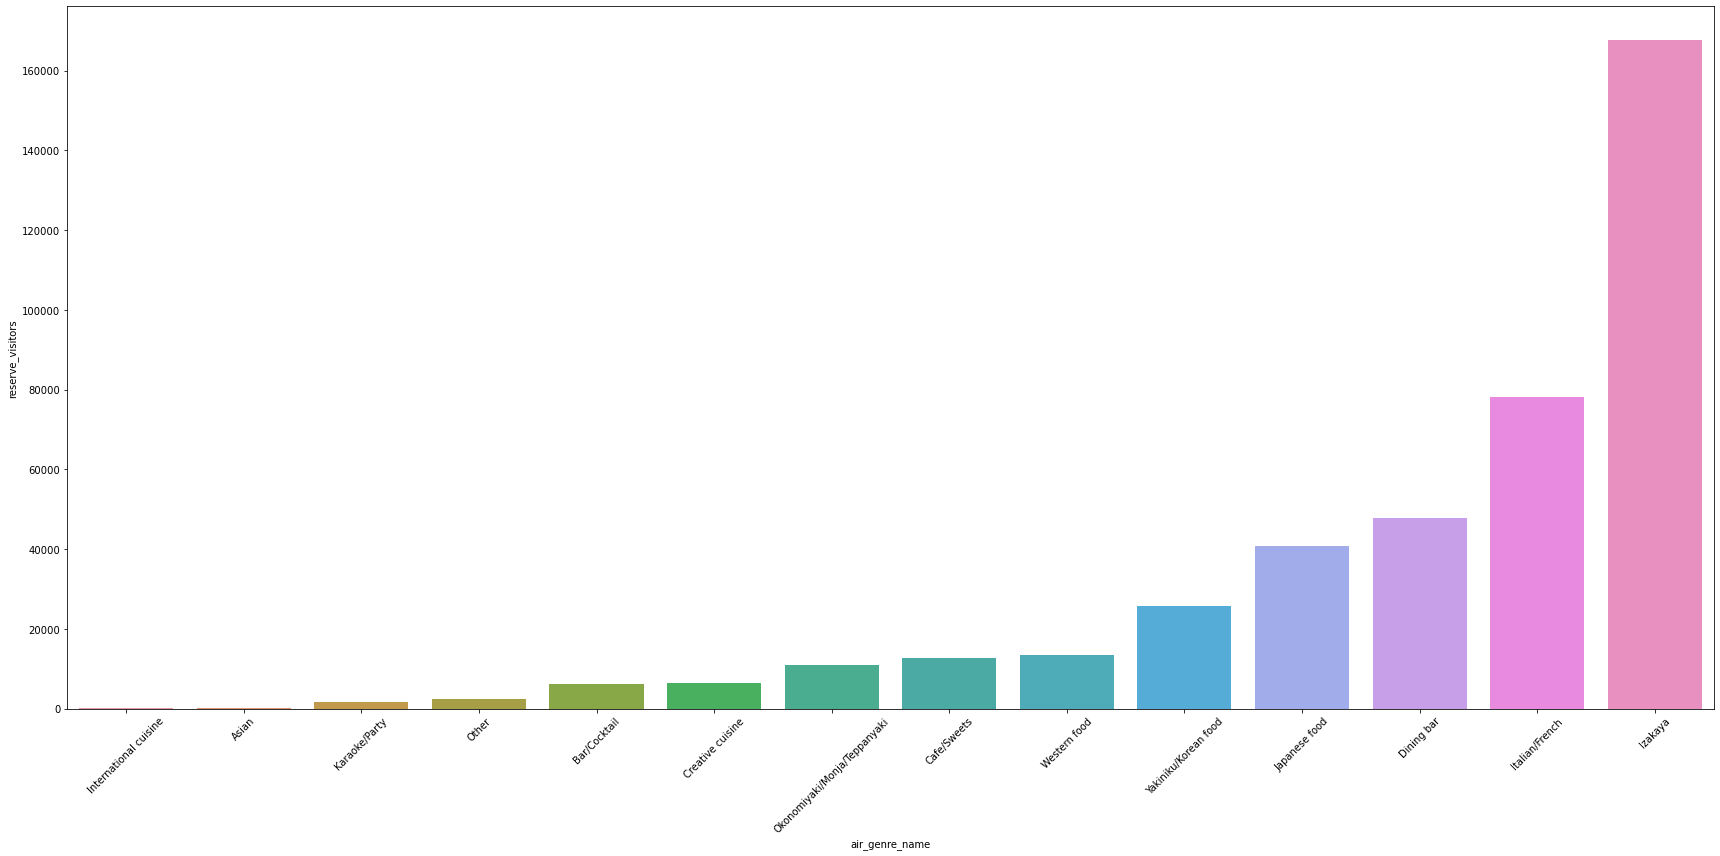

In [44]:
fig, ax = plt.subplots(figsize = (24,12))
sns.barplot(x = air_genre.index, y ='reserve_visitors', data = air_genre)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Then with with hpg_genre
hpg_genre = df_hpg.groupby(by='hpg_genre_name').sum().drop(['latitude', 'longitude'],axis = 1).sort_values(by=['reserve_visitors'],ascending=True)

In [46]:
hpg_genre

,reserve_visitors
hpg_genre_name,
Spain/Mediterranean cuisine,531
Udon/Soba,623
Sweets,795
Shanghai food,1177
Taiwanese/Hong Kong cuisine,1445
Dim Sum/Dumplings,1609
Amusement bar,1966
Sichuan food,2809
Cantonese food,3581


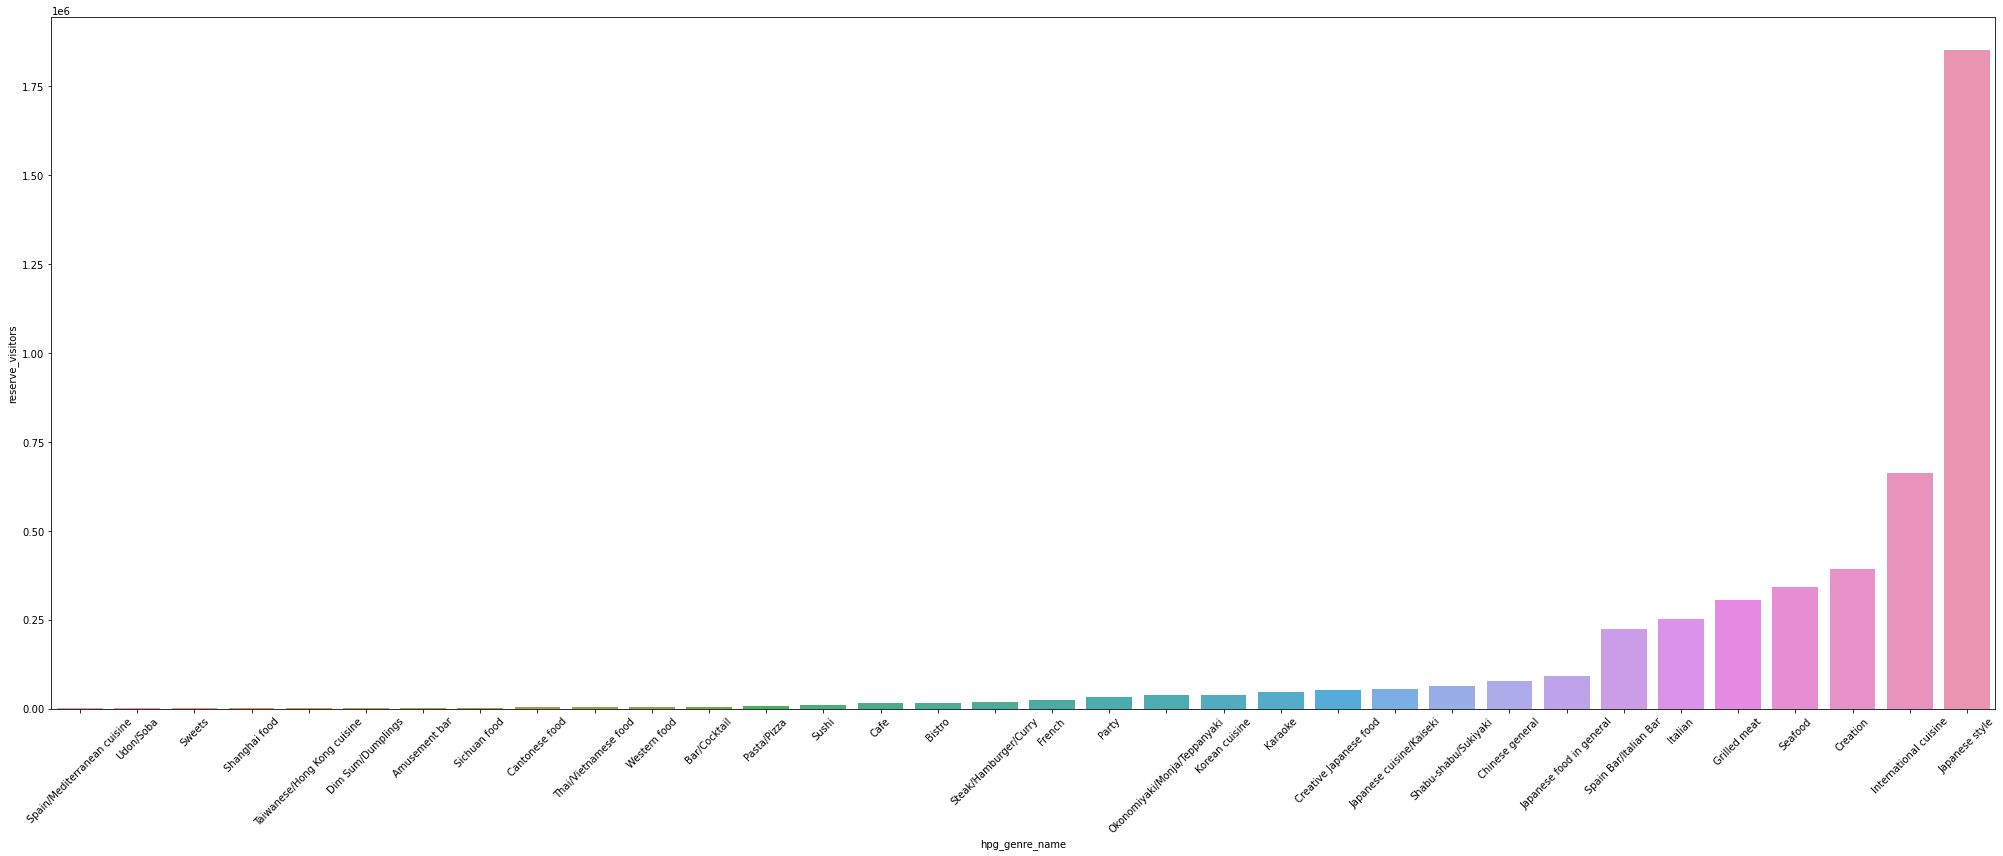

In [47]:
fig, ax = plt.subplots(figsize = (28,12))
sns.barplot(x = hpg_genre.index, y ='reserve_visitors', data = hpg_genre)
plt.xticks(rotation=45)
plt.tight_layout()

In [48]:
# Difference is large between two datasets!

# If you want to start a restaurant, you'd be better off making one that serves japanes food!

In [49]:
# Getting dates which are holidays, but NOT saturday or sunday!
dates = date_info.loc[date_info['holiday_flg']==1].loc[(date_info['day_of_week'] !='Saturday')].loc[date_info['day_of_week'] !='Sunday']
dates.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
10,2016-01-11,Monday,1
41,2016-02-11,Thursday,1
80,2016-03-21,Monday,1
119,2016-04-29,Friday,1


In [50]:
# Making a new feature that states if visit occured on a holiday

In [51]:
#Extracting times and dates from visit and reserves

visit_datetime = pd.to_datetime(df_full['visit_datetime'])
reserve_datetime = pd.to_datetime(df_full['reserve_datetime'])

# Making a new column for visit/reserve dates and time from dt.date/time
df_full['visit_date']=visit_datetime.dt.date
df_full['visit_time']=visit_datetime.dt.time
df_full['reserve_date']=reserve_datetime.dt.date
df_full['reserve_time']=reserve_datetime.dt.time

In [52]:
df_full.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster,visit_date,visit_time,reserve_date,reserve_time
visit_datetime,,,,,,,,,,,,,,,,
2016-01-01 13:00:00,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-01,13:00:00,2016-01-01,06:00:00
2016-01-02 12:00:00,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-02,12:00:00,2016-01-01,20:00:00
2016-01-03 19:00:00,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-03,19:00:00,2016-01-02,15:00:00
2016-01-06 12:00:00,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-06,12:00:00,2016-01-06,08:00:00
2016-01-10 17:00:00,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-10,17:00:00,2016-01-04,22:00:00


In [53]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   calendar_date  517 non-null    object
 1   day_of_week    517 non-null    object
 2   holiday_flg    517 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [54]:
# Making a series from calendar_date

dates = pd.to_datetime(date_info['calendar_date'])

In [55]:
days_of_the_week = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [56]:
date_info['calendar_date'] = pd.to_datetime(date_info['calendar_date']).dt.date

In [57]:
# Adding day of the week and day of the year to date_info

date_info['day_of_year'] = dates.dt.dayofyear
date_info['day_of_week'] = [days.index(dw) for dw in date_info['day_of_week']]

In [58]:
# Merging the holiday flags with full df!!!

new_df_full = pd.merge(df_full,date_info[['calendar_date','holiday_flg']],how='left',left_on='visit_date',right_on='calendar_date')

In [59]:
# Renaming column from holiday_flg to visit_holiday

new_df_full = new_df_full.rename(index = str, columns = {'holiday_flg':'visit_holiday'})

In [60]:
new_df_full = new_df_full.drop(['calendar_date'],axis=1)

In [61]:
new_df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster,visit_date,visit_time,reserve_date,reserve_time,visit_holiday
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-01,13:00:00,2016-01-01,06:00:00,1
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-02,12:00:00,2016-01-01,20:00:00,1
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-03,19:00:00,2016-01-02,15:00:00,1
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-06,12:00:00,2016-01-06,08:00:00,0
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,0,2016-01-10,17:00:00,2016-01-04,22:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1,2017-05-16,19:00:00,2017-04-20,19:00:00,0
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1,2017-05-21,18:00:00,2017-04-20,19:00:00,0
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,1,2017-05-21,19:00:00,2017-04-20,19:00:00,0
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,10,2017-04-20,23:00:00,2017-04-20,10:00:00,0


In [62]:
# Doing the same, but for the reservation info

new_df_full = pd.merge(new_df_full,date_info[['calendar_date','holiday_flg']],how='left',left_on='reserve_date',right_on='calendar_date')
new_df_full = new_df_full.rename(index = str, columns = {'holiday_flg':'reservation_holiday'})
new_df_full = new_df_full.drop(['calendar_date'],axis=1)

In [63]:
# Getting days of the year for visit and reserve dates

new_df_full['visit_date'] = pd.to_datetime(new_df_full['visit_date']).dt.dayofyear
new_df_full['reserve_date'] = pd.to_datetime(new_df_full['reserve_date']).dt.dayofyear

In [64]:
# Can now estimate time between reservations and visits!

time_between_res_vis = visit_datetime-reserve_datetime
delta = time_between_res_vis.dt.days
delta.describe()

count    963686.000000
mean          6.909061
std          11.507296
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         393.000000
dtype: float64

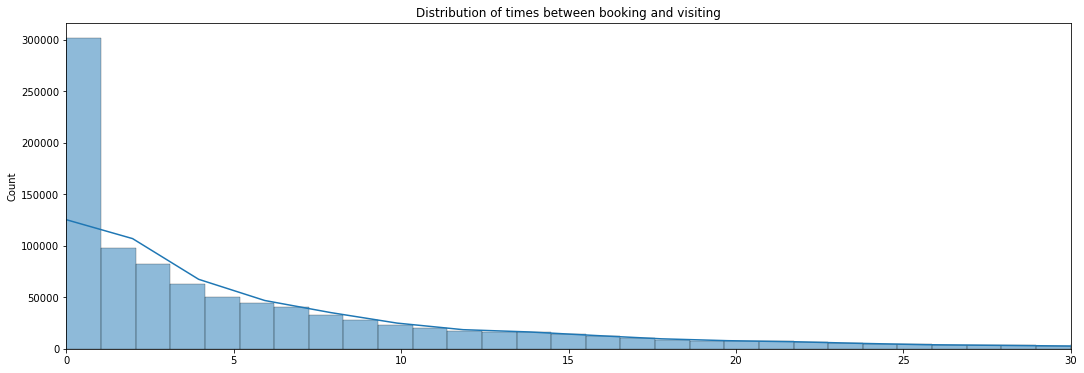

In [65]:
# Making a distribution plot

fig, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(delta, bins = 380, kde = True)
plt.title('Distribution of times between booking and visiting')
plt.xlim(0,30)
plt.show()

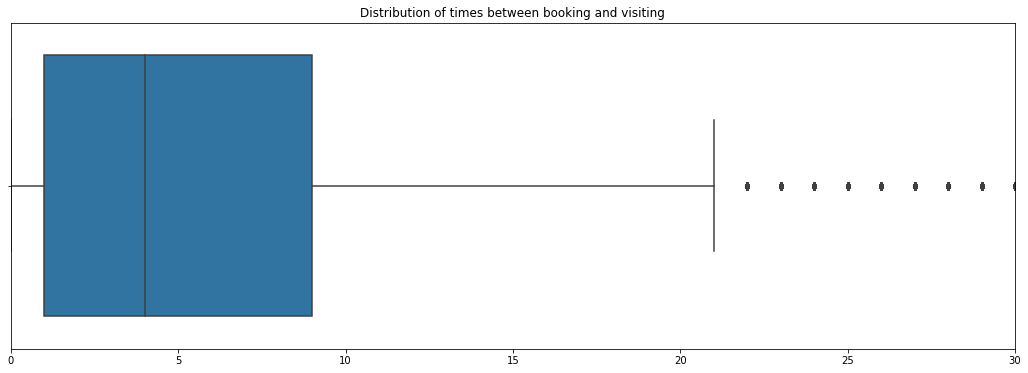

In [66]:
# Making a distribution plot

fig, ax = plt.subplots(figsize = (18,6))
ax = sns.boxplot(x = delta)
plt.title('Distribution of times between booking and visiting')
plt.xlim(0,30)
plt.show()

In [67]:
# Checking vists and reservations during holidays 

holihist_visit = new_df_full[new_df_full['visit_holiday']==1].groupby(['visit_date'],as_index=False).count()
non_holihist_visit = new_df_full[new_df_full['visit_holiday']==0].groupby(['visit_date'],as_index=False).count()
holihist_reserve = new_df_full[new_df_full['visit_holiday']==1].groupby(['reserve_date'],as_index=False).count()
non_holihist_reserve = new_df_full[new_df_full['visit_holiday']==0].groupby(['reserve_date'],as_index=False).count()

In [68]:
# Plotting results!

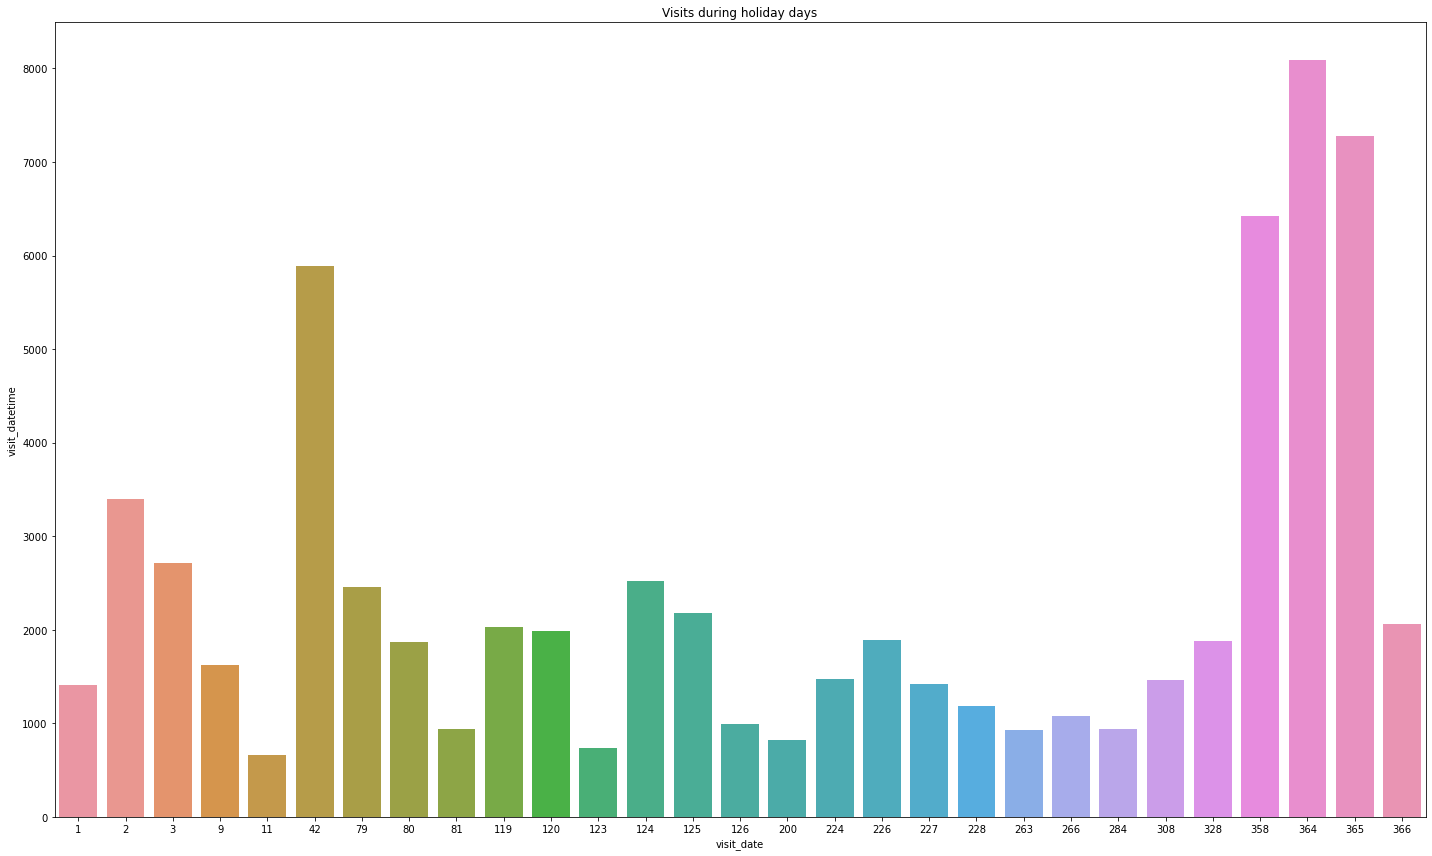

In [69]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
sns.barplot(x = holihist_visit['visit_date'], y=holihist_visit['visit_datetime'])
plt.title('Visits during holiday days')
plt.tight_layout()
plt.show()

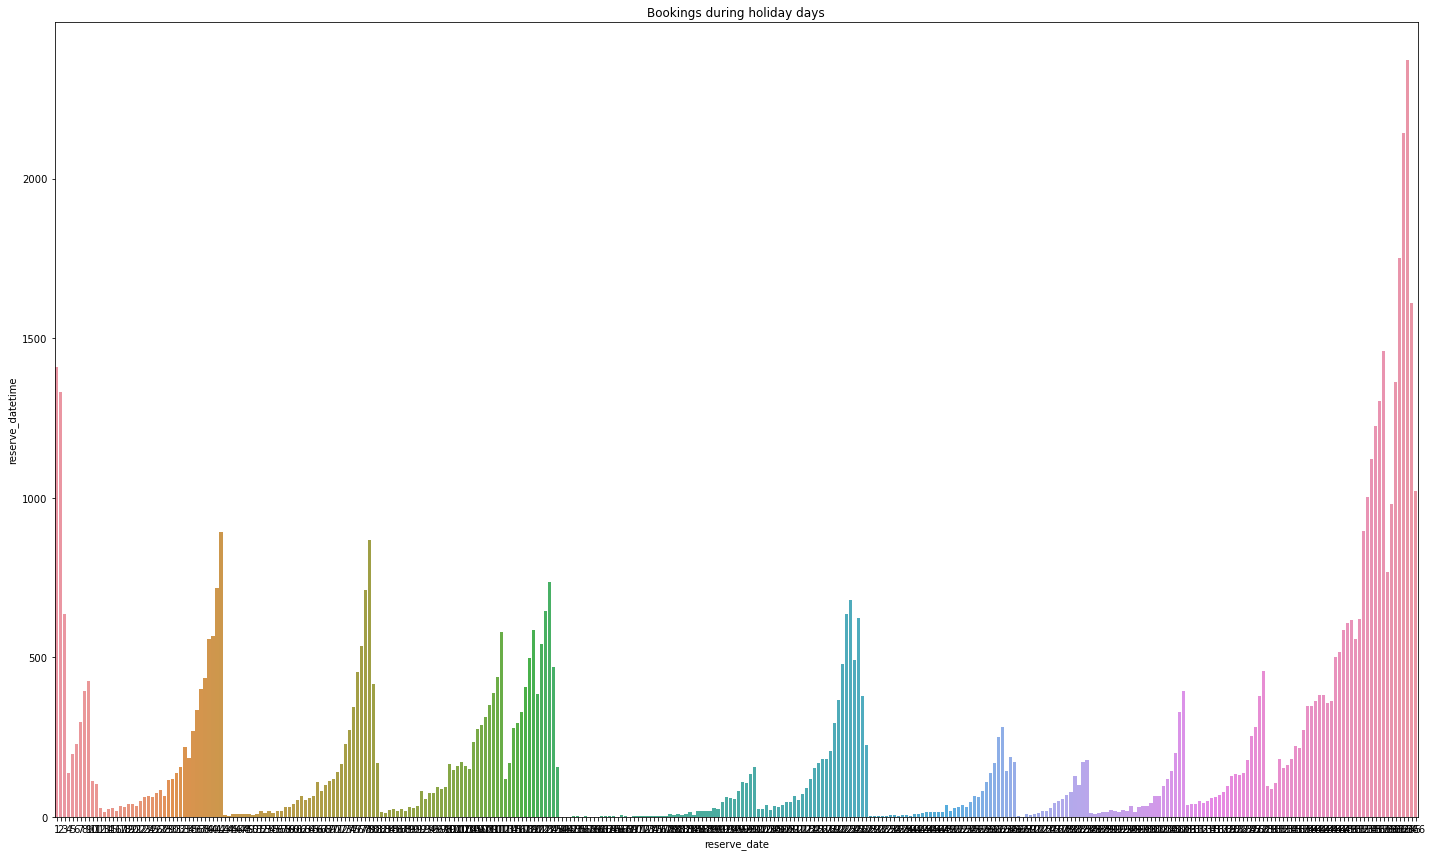

In [70]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
sns.barplot(x = holihist_reserve['reserve_date'], y=holihist_reserve['reserve_datetime'])
plt.title('Bookings during holiday days')
plt.tight_layout()
plt.show()

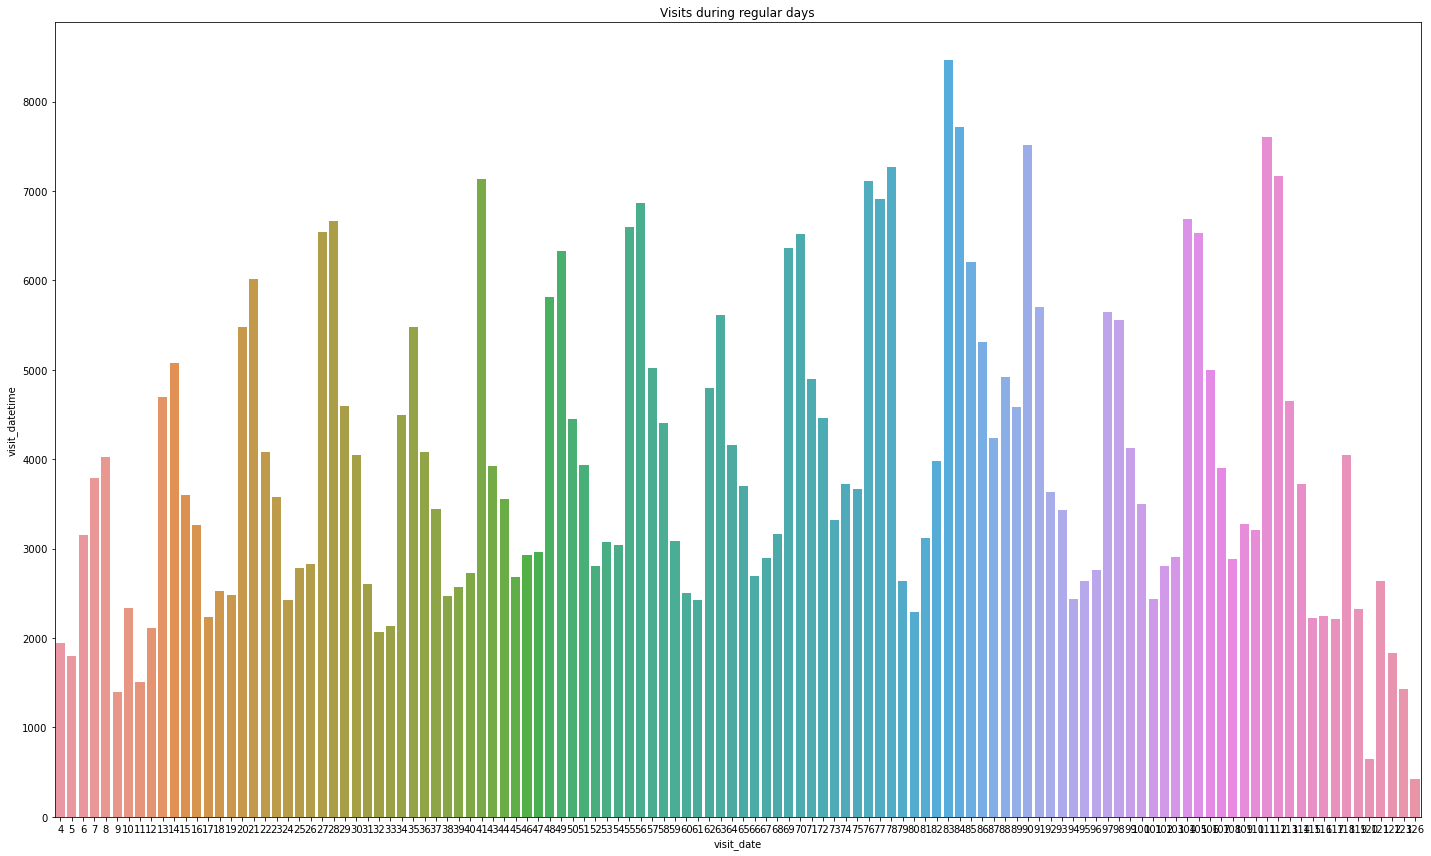

In [71]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
sns.barplot(x = non_holihist_visit['visit_date'][0:120], y=non_holihist_visit['visit_datetime'])
plt.title('Visits during regular days')
plt.tight_layout()
plt.show()

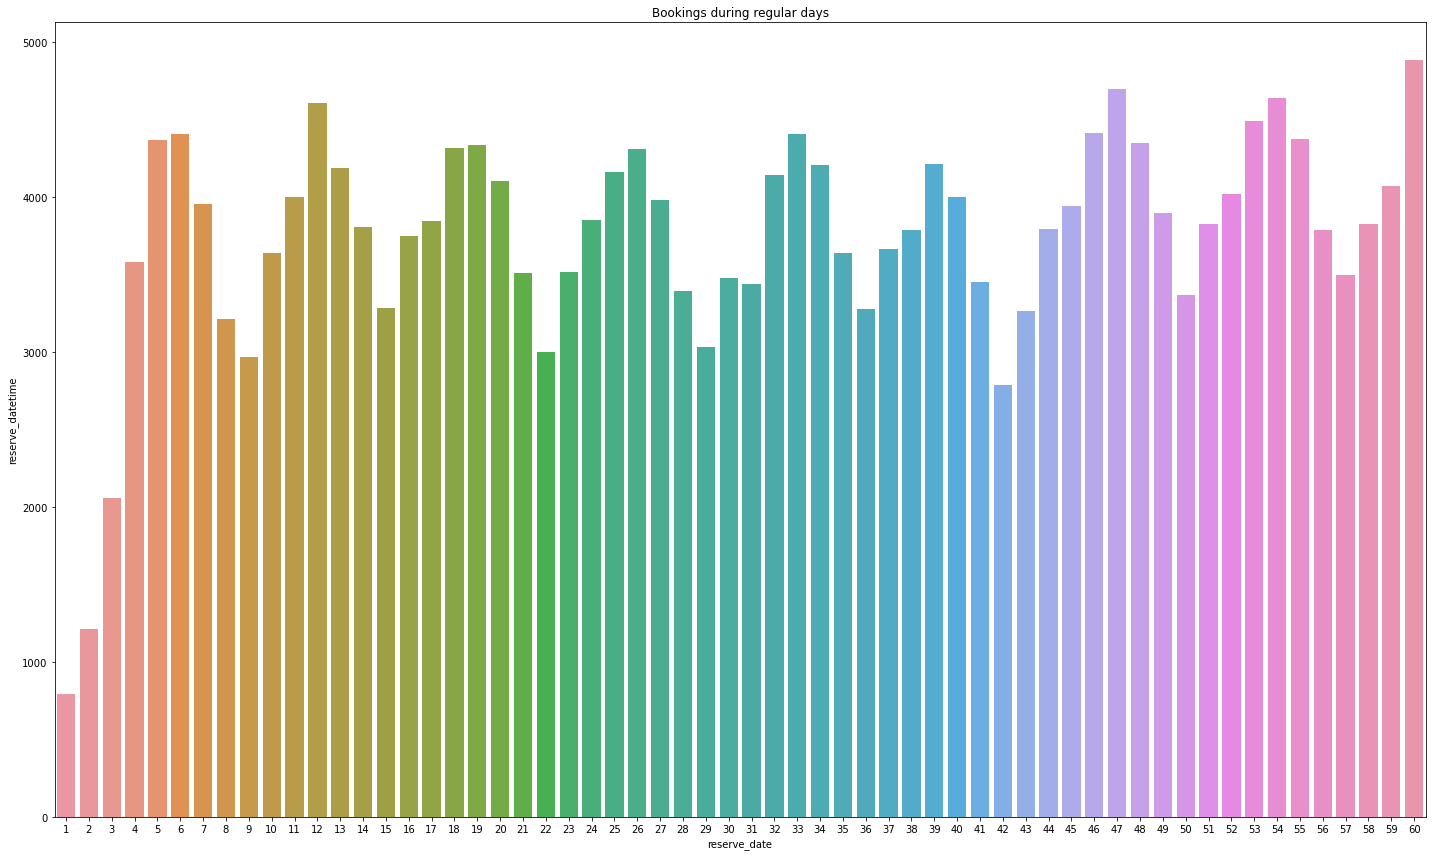

In [72]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
sns.barplot(x = non_holihist_reserve['reserve_date'][0:60], y=non_holihist_reserve['reserve_datetime'])
plt.title('Bookings during regular days')
plt.tight_layout()
plt.show()

In [73]:
# Initialise RNN definitions - making a unified df for reserve and visits

reserve = cum_df_reserve.drop(['latitude','longitude'], axis = 1)
visit = cum_df_visit.drop(['latitude','longitude'], axis = 1)

In [74]:
visit.resample('1H', label='right').sum()

,reserve_visitors
visit_datetime,
2016-01-01 14:00:00,3
2016-01-01 15:00:00,0
2016-01-01 16:00:00,0
2016-01-01 17:00:00,0
2016-01-01 18:00:00,35
...,...
2017-05-31 20:00:00,37
2017-05-31 21:00:00,13
2017-05-31 22:00:00,12


<AxesSubplot:xlabel='visit_datetime'>

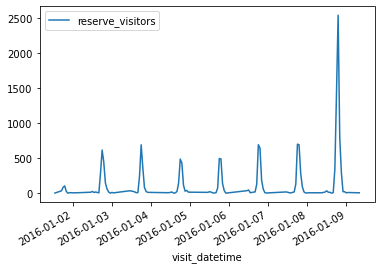

In [75]:
visit[0:100].plot()

<AxesSubplot:xlabel='visit_datetime'>

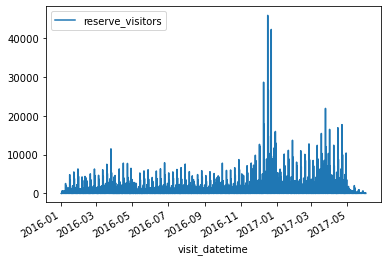

In [76]:
visit.plot()

<AxesSubplot:xlabel='reserve_datetime'>

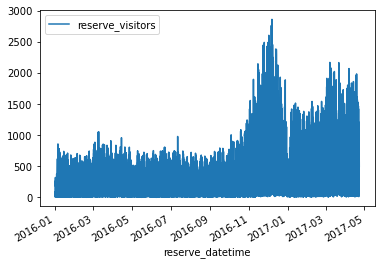

In [77]:
reserve.plot()

In [78]:
# Merging both dfs
unified = pd.merge(reserve,visit,left_index=True, right_index=True,how="outer")

In [79]:
unified = unified.fillna(value=0)

In [80]:
unified.columns=['reservations','visitors']

<AxesSubplot:>

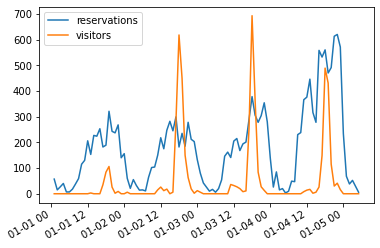

In [81]:
unified[1:100].plot()

In [82]:
# Now we have reserve, visits and unified for neural network usage

In [83]:
print(len(reserve), len(visit))

11421 8678


In [84]:
# Starting with Visit df

In [85]:
#visit_resample = visit.resample('H').sum()

In [86]:
visit_resample = visit

In [87]:
visit_resample 

,reserve_visitors
visit_datetime,
2016-01-01 13:00:00,3
2016-01-01 17:00:00,35
2016-01-01 18:00:00,84
2016-01-01 19:00:00,106
2016-01-01 20:00:00,26
...,...
2017-05-31 18:00:00,171
2017-05-31 19:00:00,37
2017-05-31 20:00:00,13


In [88]:
visit_resample.shape

(8678, 1)

In [89]:
train_size = int(len(visit_resample)*0.8)

In [90]:
train_size

6942

In [91]:
# Train/test split
train = visit_resample .iloc[:train_size]
test = visit_resample .iloc[train_size:]

In [92]:
print(len(train), len(test))

6942 1736


In [93]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [94]:
# Getting timeseries generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [95]:
scaled_train

array([[4.35929292e-05],
       [7.41079797e-04],
       [1.80910656e-03],
       ...,
       [2.19490399e-02],
       [6.93127575e-03],
       [1.85269949e-03]])

In [96]:
# Redefine to get 36! months back and then predict the next month out
n_input = 24
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [97]:
# What does the first batch look like?
X,y = generator[0]

In [98]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[4.35929292e-05 7.41079797e-04 1.80910656e-03 2.28862878e-03
 5.44911615e-04 2.17964646e-05 1.74371717e-04 1.08982323e-04
 3.05150505e-04 5.44911615e-04 2.39761111e-04 3.70539898e-04
 1.08982323e-04 6.14660302e-03 1.34484187e-02 9.78661261e-03
 3.24767323e-03 1.35138081e-03 3.92336363e-04 2.17964646e-05
 2.39761111e-04 1.08982323e-04 7.62876261e-04 6.75690403e-04]
Predict this y: 
 [[0.00056671]]


In [99]:
#Creating model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)
n_features = 1

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss="mean_squared_logarithmic_error")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [101]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=n_input, batch_size=1)

In [102]:
# fit model
model.fit(generator,epochs=50,callbacks=[early_stop],validation_data=validation_generator)

Epoch 1/50
6918/6918 [==============================] - 104s 15ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 2/50
6918/6918 [==============================] - 106s 15ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 3/50
6918/6918 [==============================] - 101s 15ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 4/50
6918/6918 [==============================] - 110s 16ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 5/50
6918/6918 [==============================] - 92s 13ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 6/50
6918/6918 [==============================] - 85s 12ms/step - loss: 0.0011 - val_loss: 0.0018


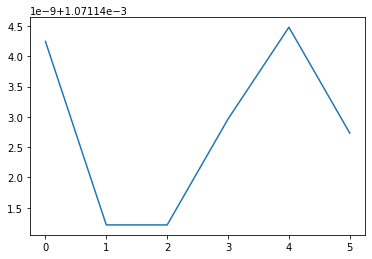

In [103]:
model.history.history.keys()
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [104]:
# Evaluating on test data

first_eval_batch = scaled_train[-24:]
first_eval_batch

array([[0.00021796],
       [0.0006103 ],
       [0.00198348],
       [0.01220602],
       [0.07011923],
       [0.07434774],
       [0.02079383],
       [0.00714924],
       [0.00272456],
       [0.0005885 ],
       [0.00047952],
       [0.00021796],
       [0.00387977],
       [0.0037054 ],
       [0.00222324],
       [0.00043593],
       [0.00045773],
       [0.00071928],
       [0.00913272],
       [0.06913839],
       [0.07800955],
       [0.02194904],
       [0.00693128],
       [0.0018527 ]])

In [105]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [106]:
test_predictions

[array([-0.00123388], dtype=float32),
 array([-0.00098155], dtype=float32),
 array([-0.00078114], dtype=float32),
 array([-0.00062093], dtype=float32),
 array([-0.00049092], dtype=float32),
 array([-0.00038643], dtype=float32),
 array([-0.00030297], dtype=float32),
 array([-0.0002372], dtype=float32),
 array([-0.0001847], dtype=float32),
 array([-0.00014318], dtype=float32),
 array([-0.00011056], dtype=float32),
 array([-8.491969e-05], dtype=float32),
 array([-6.474572e-05], dtype=float32),
 array([-4.8824593e-05], dtype=float32),
 array([-3.6398294e-05], dtype=float32),
 array([-2.6858575e-05], dtype=float32),
 array([-1.9613337e-05], dtype=float32),
 array([-1.41514065e-05], dtype=float32),
 array([-1.00250345e-05], dtype=float32),
 array([-6.8271397e-06], dtype=float32),
 array([-3.782278e-06], dtype=float32),
 array([-1.0409854e-06], dtype=float32),
 array([-4.1378001e-07], dtype=float32),
 array([-2.5418464e-07], dtype=float32),
 array([-1.851387e-07], dtype=float32),
 array([-1.4

In [107]:
scaled_test

array([[0.00076288],
       [0.00045773],
       [0.00091545],
       ...,
       [0.00026156],
       [0.00023976],
       [0.00010898]])

In [108]:
# Perform inverse tranformations for better comparison

true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[-55.60913515],
       [-44.03246142],
       [-34.83800214],
       ...,
       [  1.        ],
       [  1.        ],
       [  1.        ]])

In [109]:
test['Predictions'] = true_predictions

/Users/kieranodonnell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='visit_datetime'>

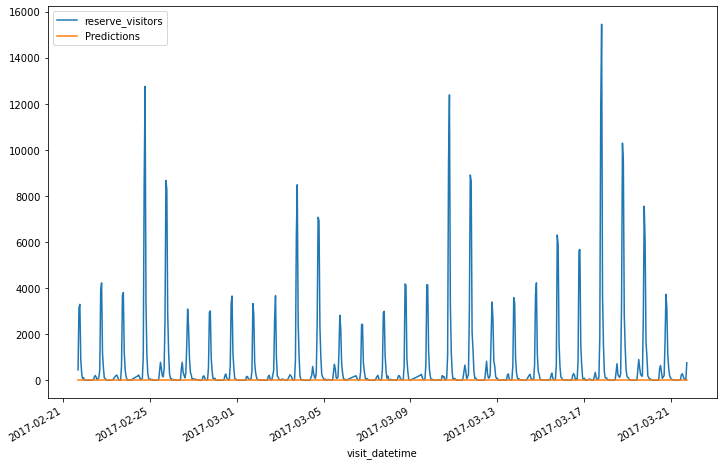

In [110]:
test[200:700].plot(figsize=(12,8))

In [111]:
series = visit_resample['reserve_visitors'].values.reshape(-1,1)

In [112]:
series

array([[ 3],
       [35],
       [84],
       ...,
       [13],
       [12],
       [ 6]])

In [113]:
# Building dataset

T = 24 # T past timesteps used for predictions
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    y = series[t+T]
    X.append(x)
    Y.append(y)
    
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print(f"X shape is {X.shape} and Y shape is {Y.shape}")

X shape is (8654, 24) and Y shape is (8654, 1)


In [114]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
# Making autoregressive model

i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(lr=0.01))

# Train model -> splitting at 0.3 and validates at 0.3

r = model.fit(X[:-N//3], Y[:-N//3],
             epochs = 100,
             validation_data = (X[-N//3:], Y[-N//3:]))

Epoch 1/100
181/181 [==============================] - 0s 1ms/step - loss: 944078.1250 - val_loss: 3945100.5000
Epoch 2/100
181/181 [==============================] - 0s 958us/step - loss: 517954.5938 - val_loss: 3349780.2500
Epoch 3/100
181/181 [==============================] - 0s 974us/step - loss: 460140.8438 - val_loss: 3176105.2500
Epoch 4/100
181/181 [==============================] - 0s 962us/step - loss: 446957.9688 - val_loss: 3108319.2500
Epoch 5/100
181/181 [==============================] - 0s 974us/step - loss: 439744.4688 - val_loss: 3260839.5000
Epoch 6/100
181/181 [==============================] - 0s 963us/step - loss: 437057.1562 - val_loss: 3224549.5000
Epoch 7/100
181/181 [==============================] - 0s 970us/step - loss: 435339.7500 - val_loss: 3151761.2500
Epoch 8/100
181/181 [==============================] - 0s 982us/step - loss: 429169.9062 - val_loss: 3211317.2500
Epoch 9/100
181/181 [==============================] - 0s 965us/step - loss: 436205.9062 -

181/181 [==============================] - 0s 946us/step - loss: 438704.6250 - val_loss: 3136974.5000
Epoch 73/100
181/181 [==============================] - 0s 968us/step - loss: 435396.6562 - val_loss: 3250407.5000
Epoch 74/100
181/181 [==============================] - 0s 972us/step - loss: 433284.5625 - val_loss: 3133588.2500
Epoch 75/100
181/181 [==============================] - 0s 967us/step - loss: 433740.1562 - val_loss: 3146020.0000
Epoch 76/100
181/181 [==============================] - 0s 983us/step - loss: 430510.8750 - val_loss: 3220992.5000
Epoch 77/100
181/181 [==============================] - 0s 1ms/step - loss: 430942.0312 - val_loss: 3133661.7500
Epoch 78/100
181/181 [==============================] - 0s 951us/step - loss: 432932.0312 - val_loss: 3195762.5000
Epoch 79/100
181/181 [==============================] - 0s 950us/step - loss: 429239.4062 - val_loss: 3312477.0000
Epoch 80/100
181/181 [==============================] - 0s 953us/step - loss: 435652.0000 - val

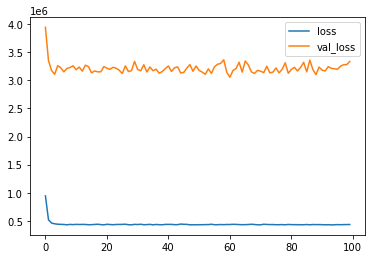

In [115]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [116]:
# Right way to predict: Forecast using self-predicted targets

val_target = Y[-N//3:]
val_pred = []

# Index for 1st validation point

prev_x = X[-N//3] # this is a 1D array of length T

while len(val_pred) < len(val_target):
    pred = model.predict(prev_x.reshape(1,-1))[0,0] # Need a scalar = 1x1 array
    
    # Update preds
    val_pred.append(pred)
    
    # Update inputs
    prev_x = np.roll(prev_x,-1)
    prev_x[-1] = pred

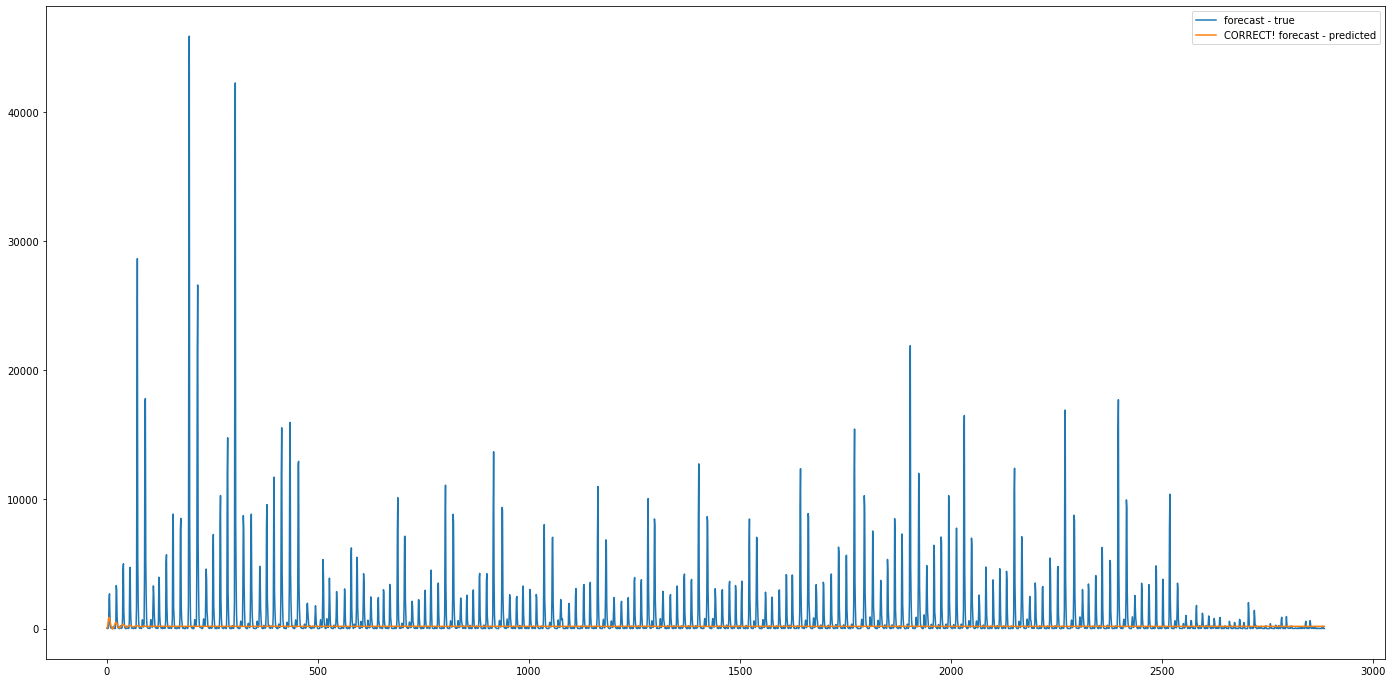

In [117]:
# Correct method -> plot not as good!
plt.figure(figsize=(24,12))
plt.plot(val_target, label = 'forecast - true')
plt.plot(val_pred, label = 'CORRECT! forecast - predicted')
plt.legend()

In [118]:
# Now using Simple RNNs

# Making Model

i = Input(shape=(T,1))
x = SimpleRNN(5, activation = 'tanh')(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss='mae', optimizer=Adam(lr=0.01))

# Train model -> splitting at 0.3 and validates at 0.3

r = model.fit(X[:-N//3], Y[:-N//3],
             epochs = 100,
             validation_data = (X[-N//3:], Y[-N//3:]))

Epoch 1/100
181/181 [==============================] - 1s 8ms/step - loss: 413.6552 - val_loss: 907.9526
Epoch 2/100
181/181 [==============================] - 1s 7ms/step - loss: 408.7391 - val_loss: 903.5605
Epoch 3/100
181/181 [==============================] - 1s 8ms/step - loss: 405.4698 - val_loss: 899.5801
Epoch 4/100
181/181 [==============================] - 1s 8ms/step - loss: 402.3448 - val_loss: 896.0629
Epoch 5/100
181/181 [==============================] - 1s 7ms/step - loss: 399.6367 - val_loss: 892.7292
Epoch 6/100
181/181 [==============================] - 1s 6ms/step - loss: 397.0601 - val_loss: 889.2083
Epoch 7/100
181/181 [==============================] - 1s 6ms/step - loss: 394.6368 - val_loss: 886.2092
Epoch 8/100
181/181 [==============================] - 1s 6ms/step - loss: 392.3940 - val_loss: 883.2112
Epoch 9/100
181/181 [==============================] - 1s 6ms/step - loss: 390.1009 - val_loss: 881.0063
Epoch 10/100
181/181 [==============================] -

181/181 [==============================] - 2s 11ms/step - loss: 356.6351 - val_loss: 836.3706
Epoch 79/100
181/181 [==============================] - 2s 9ms/step - loss: 357.1078 - val_loss: 835.0314
Epoch 80/100
181/181 [==============================] - 2s 9ms/step - loss: 356.1295 - val_loss: 835.3409
Epoch 81/100
181/181 [==============================] - 2s 9ms/step - loss: 353.2179 - val_loss: 830.9715
Epoch 82/100
181/181 [==============================] - 2s 9ms/step - loss: 353.9593 - val_loss: 833.4108
Epoch 83/100
181/181 [==============================] - 2s 10ms/step - loss: 351.4471 - val_loss: 827.0690
Epoch 84/100
181/181 [==============================] - 2s 9ms/step - loss: 361.7896 - val_loss: 846.3356
Epoch 85/100
181/181 [==============================] - 2s 10ms/step - loss: 357.6761 - val_loss: 837.1938
Epoch 86/100
181/181 [==============================] - 1s 8ms/step - loss: 398.9303 - val_loss: 890.2775
Epoch 87/100
181/181 [==============================] - 

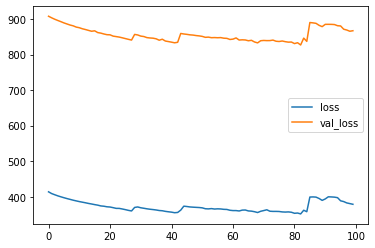

In [119]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [120]:
# Right way to predict: Forecast using self-predicted targets

val_target = Y[-N//3:]
val_pred = []

# Index for 1st validation point

prev_x = X[-N//3] # this is a 1D array of length T

while len(val_pred) < len(val_target):
    pred = model.predict(prev_x.reshape(1,-1,1))[0,0] # Need a scalar = 1x1 array
    
    # Update preds
    val_pred.append(pred)
    
    # Update inputs
    prev_x = np.roll(prev_x,-1)
    prev_x[-1] = pred

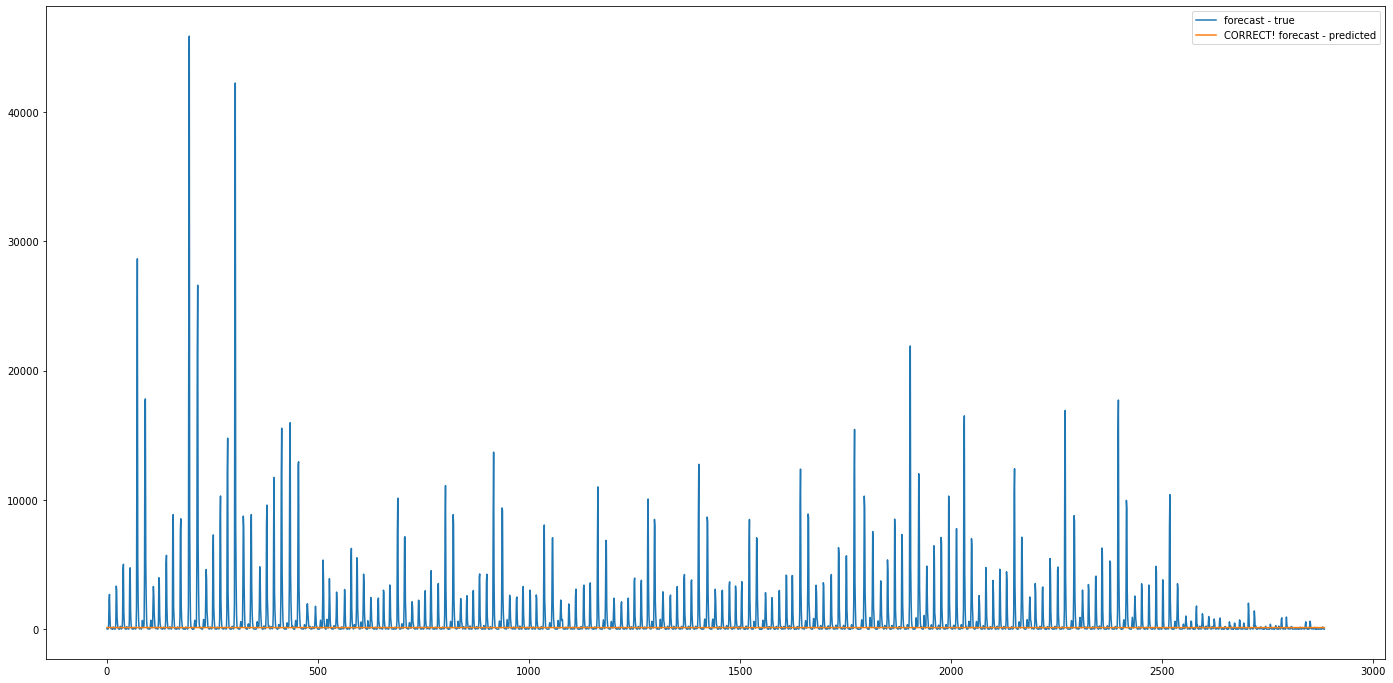

In [121]:
# Correct method -> plot not as good!
plt.figure(figsize=(24,12))
plt.plot(val_target, label = 'forecast - true')
plt.plot(val_pred, label = 'CORRECT! forecast - predicted')
plt.legend()

In [122]:
# Now adding more LST and GRUs

In [123]:
series = visit_resample['reserve_visitors'].values.reshape(-1,1)

In [125]:
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [126]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (8668, 10, 1) Y.shape (8668,)


In [127]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
136/136 [==============================] - 2s 14ms/step - loss: 0.4135 - val_loss: 3.5237
Epoch 2/80
136/136 [==============================] - 1s 7ms/step - loss: 0.2785 - val_loss: 3.2810
Epoch 3/80
136/136 [==============================] - 1s 7ms/step - loss: 0.2403 - val_loss: 3.0272
Epoch 4/80
136/136 [==============================] - 1s 7ms/step - loss: 0.1987 - val_loss: 2.8337
Epoch 5/80
136/136 [==============================] - 1s 7ms/step - loss: 0.1780 - val_loss: 2.8574
Epoch 6/80
136/136 [==============================] - 1s 7ms/step - loss: 0.1894 - val_loss: 2.8167
Epoch 7/80
136/136 [==============================] - 1s 7ms/step - loss: 0.1483 - val_loss: 2.8082
Epoch 8/80
136/136 [==============================] - 1s 8ms/step - loss: 0.1913 - val_loss: 3.0426
Epoch 9/80
136/136 [==============================] - 1s 9ms/step - loss: 0.1580 - val_loss: 2.7207
Epoch 10/80
136/136 [==============================] - 1s 9ms/step - loss: 0.1566 - val_loss: 2.743

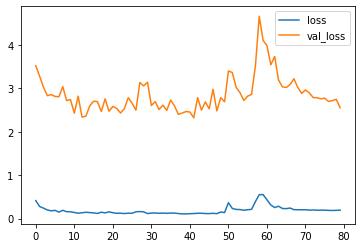

In [128]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(8668, 1)


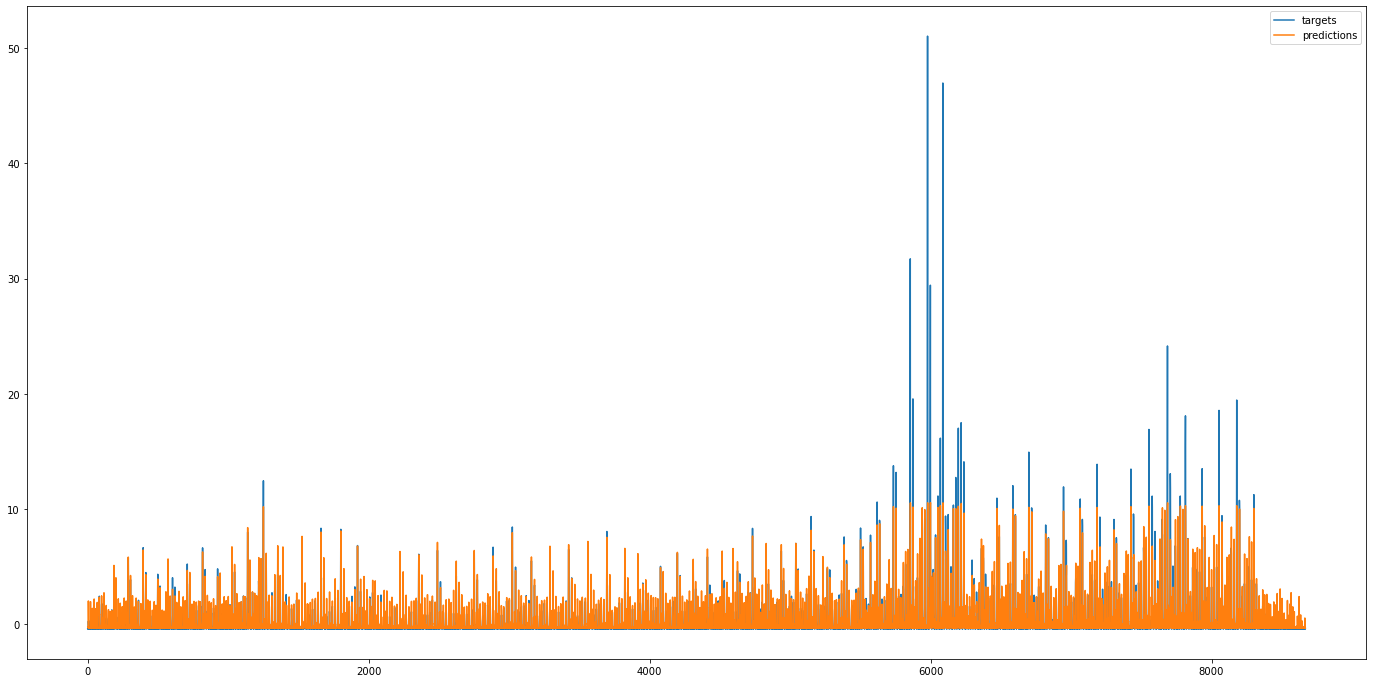

In [131]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.figure(figsize=(24,12))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

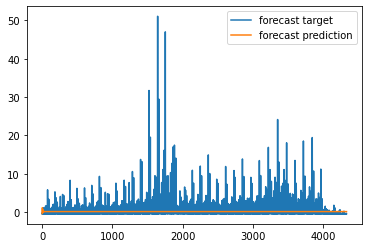

In [132]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# Not great for multi-step forecast...
# Need to imporve multi step...

In [135]:
reserve

,reserve_visitors
reserve_datetime,
2016-01-01 00:00:00,90
2016-01-01 01:00:00,57
2016-01-01 02:00:00,15
2016-01-01 03:00:00,27
2016-01-01 04:00:00,40
...,...
2017-04-22 19:00:00,858
2017-04-22 20:00:00,805
2017-04-22 21:00:00,765


In [152]:
series = reserve['reserve_visitors'].values.reshape(-1,1)

In [153]:
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [154]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (11411, 10, 1) Y.shape (11411,)


In [155]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(50)(i)
x = LSTM(50)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
179/179 [==============================] - 3s 14ms/step - loss: 0.3622 - val_loss: 3.1294
Epoch 2/80
179/179 [==============================] - 2s 9ms/step - loss: 0.2343 - val_loss: 2.9969
Epoch 3/80
179/179 [==============================] - 2s 10ms/step - loss: 0.2197 - val_loss: 2.8696
Epoch 4/80
179/179 [==============================] - 2s 11ms/step - loss: 0.2179 - val_loss: 3.5967
Epoch 5/80
179/179 [==============================] - 2s 12ms/step - loss: 0.2053 - val_loss: 3.1938
Epoch 6/80
179/179 [==============================] - 2s 12ms/step - loss: 0.2016 - val_loss: 3.1449
Epoch 7/80
179/179 [==============================] - 2s 11ms/step - loss: 0.1981 - val_loss: 3.1943
Epoch 8/80
179/179 [==============================] - 2s 10ms/step - loss: 0.1971 - val_loss: 3.1005
Epoch 9/80
179/179 [==============================] - 2s 10ms/step - loss: 0.1967 - val_loss: 3.1764
Epoch 10/80
179/179 [==============================] - 2s 13ms/step - loss: 0.1906 - val_los

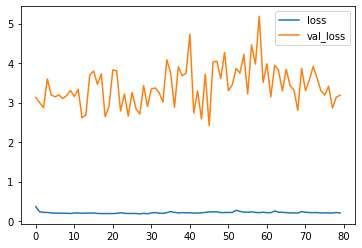

In [156]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(11411, 1)


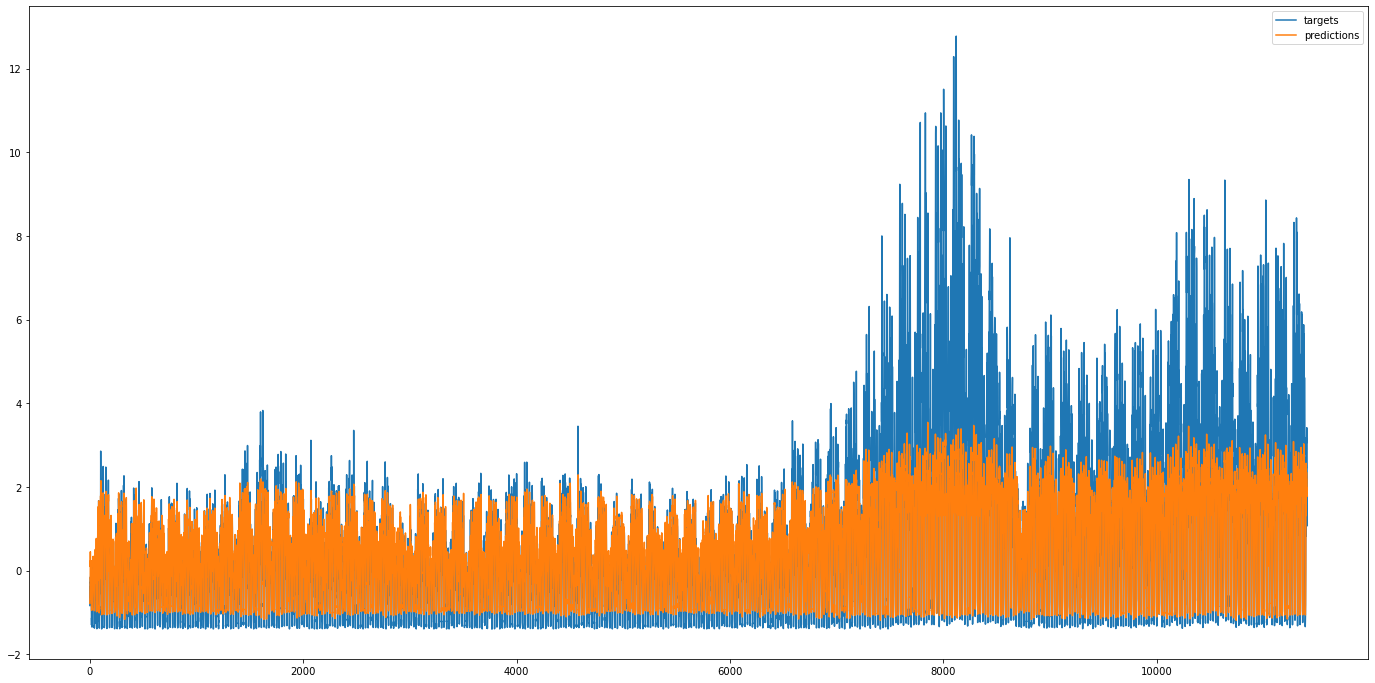

In [157]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.figure(figsize=(24,12))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

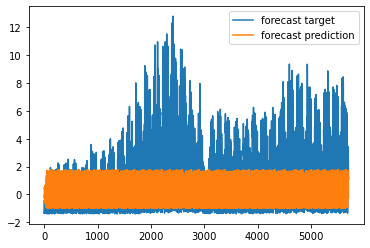

In [158]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [159]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(50)(i)
x = LSTM(50)(i)
x = LSTM(50)(i)
x = LSTM(50)(i)
x = LSTM(50)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
179/179 [==============================] - 2s 11ms/step - loss: 0.3272 - val_loss: 3.1370
Epoch 2/80
179/179 [==============================] - 1s 8ms/step - loss: 0.2231 - val_loss: 3.0213
Epoch 3/80
179/179 [==============================] - 2s 9ms/step - loss: 0.2160 - val_loss: 3.4415
Epoch 4/80
179/179 [==============================] - 2s 12ms/step - loss: 0.2096 - val_loss: 3.2368
Epoch 5/80
179/179 [==============================] - 2s 13ms/step - loss: 0.1974 - val_loss: 3.5506
Epoch 6/80
179/179 [==============================] - 2s 12ms/step - loss: 0.2017 - val_loss: 3.3448
Epoch 7/80
179/179 [==============================] - 2s 12ms/step - loss: 0.2023 - val_loss: 3.2153
Epoch 8/80
179/179 [==============================] - 2s 11ms/step - loss: 0.1973 - val_loss: 3.9774
Epoch 9/80
179/179 [==============================] - 2s 11ms/step - loss: 0.2020 - val_loss: 3.5410
Epoch 10/80
179/179 [==============================] - 2s 11ms/step - loss: 0.1975 - val_loss

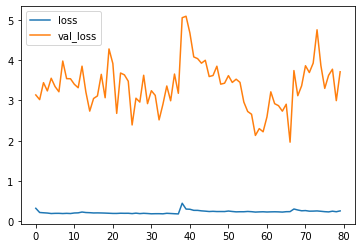

In [160]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(11411, 1)


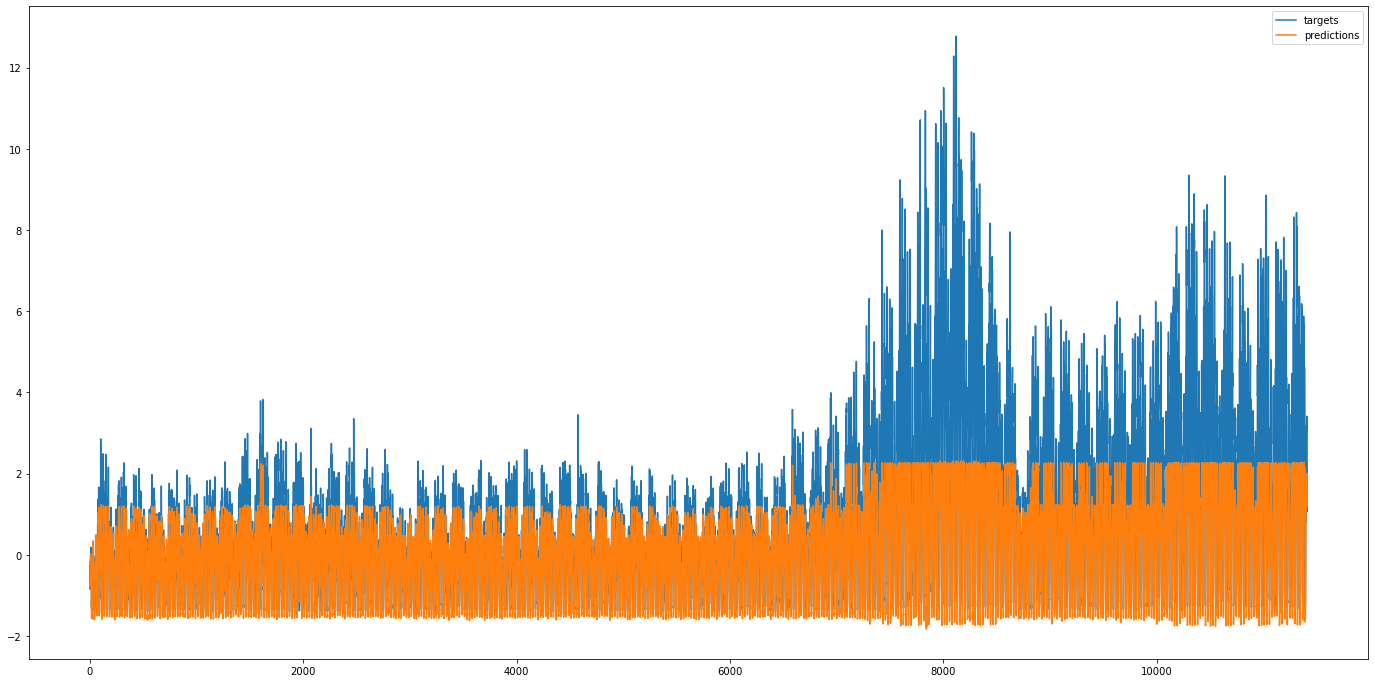

In [161]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.figure(figsize=(24,12))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

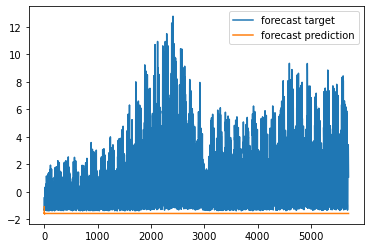

In [162]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()